**Conext**

- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Features** 

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab



In [5]:
df = pd.read_csv('../data/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Exploratory Data Analysis

In [54]:
def plot_distributions(feature):
    plt.figure(figsize=(10,2), tight_layout=True)
    plt.subplot(1, 3, 1)
    sns.kdeplot(x=feature, data=df)
    plt.title(f'kdeplot for {feature}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=df)
    plt.title(f'boxplot for {feature}')

    plt.subplot(1, 3, 3)
    stats.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

### GRE Score

**observations**: 
- mean GRE score is 316
- almost normally distributed
- no outliers

In [35]:
df['GRE Score'].min(), df['GRE Score'].median(), df['GRE Score'].mean(),  df['GRE Score'].max()

(290, 317.0, 316.472, 340)

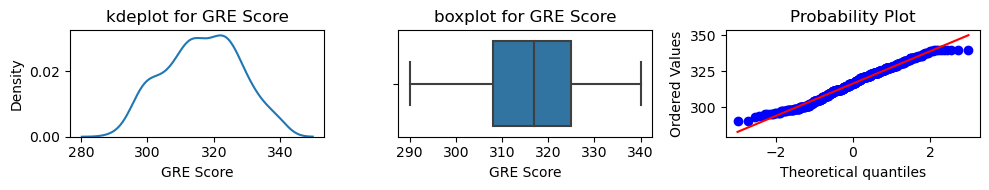

In [56]:
plot_distributions('GRE Score')

### TOEFL Score

**observations**: 
- mean "TOEFL Score" is 107
- almost normally distributed
- no outliers

In [65]:
feature = 'TOEFL Score'

In [66]:
df[feature].min(), df[feature].median(), df[feature].mean(),  df[feature].max()

(92, 107.0, 107.192, 120)

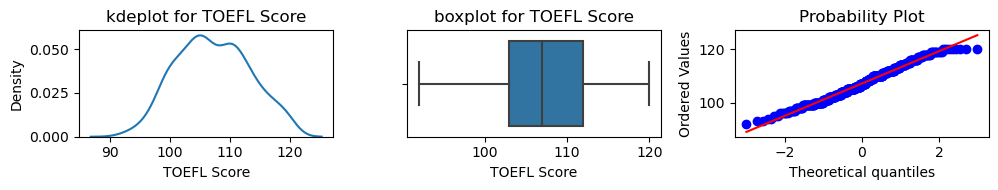

In [67]:
plot_distributions(feature)

### University Rating

**observations**: 
- rating 3 with 32.4 % values, means have high average rating
- only 6.8% has rated high

In [80]:
feature = 'University Rating'

In [70]:
df[feature].nunique()

5

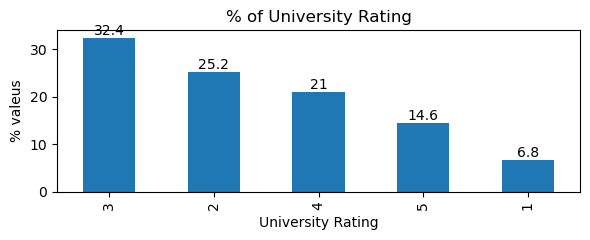

In [101]:
plt.figure(figsize=(6,2.5), tight_layout=True)
ax = (df[feature].value_counts(normalize=True)*100).plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.ylabel("% valeus")
plt.title(f"% of {feature}")
plt.show()

### SOP 
Statement of Purpose and Letter of Recommendation Strength

In [103]:
feature = 'SOP'

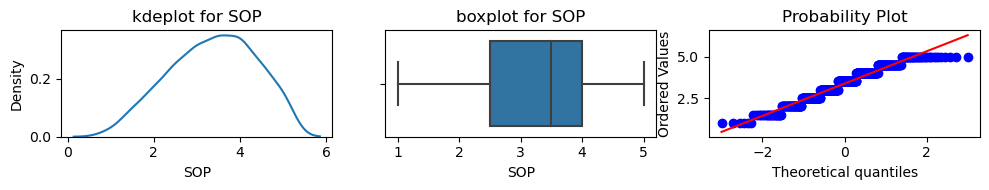

In [104]:
plot_distributions(feature)